In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
train_data=pd.read_excel(r'C:\Users\bilal\Projects\Flight Fare Prediction\Data\Data_Train.xlsx')
pd.set_option('display.max_columns',None)
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
null_val=[feature for feature in train_data.columns if train_data[feature].isnull().sum()>0]
for feature in null_val:
    print('{} contains {} % of null values'.format(feature,np.round(train_data[feature].isnull().mean(),4)))

Route contains 0.0001 % of null values
Total_Stops contains 0.0001 % of null values


In [4]:
train_data.dropna(inplace=True)

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data['Journey_Day']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [7]:
train_data['Journey_Month']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [8]:
train_data['Journey_Year']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.year

In [9]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [10]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [11]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [12]:
train_data['Departure_Hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour

In [13]:
train_data['Departure_Minute']=pd.to_datetime(train_data['Dep_Time']).dt.minute

In [14]:
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [16]:
train_data['Arrival_Hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour

In [17]:
train_data['Arrival_minute']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [18]:
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [20]:
#Handling Duration
duration=list(train_data['Duration'])
for i in range (len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
                      duration[i]=duration[i].strip() + " 0m"
        else:
                      duration[i]= "0h " + duration[i]
                      
Duration_Hours=[]
Duration_Minutes=[]
for i in range(len(duration)):
    Duration_Hours.append(int(duration[i].split(sep = 'h')[0]))
    Duration_Minutes.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

In [21]:
train_data['Duration_Hours']=Duration_Hours
train_data['Duration_Minutes']=Duration_Minutes

In [22]:
train_data.drop(['Duration'],axis=1,inplace=True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


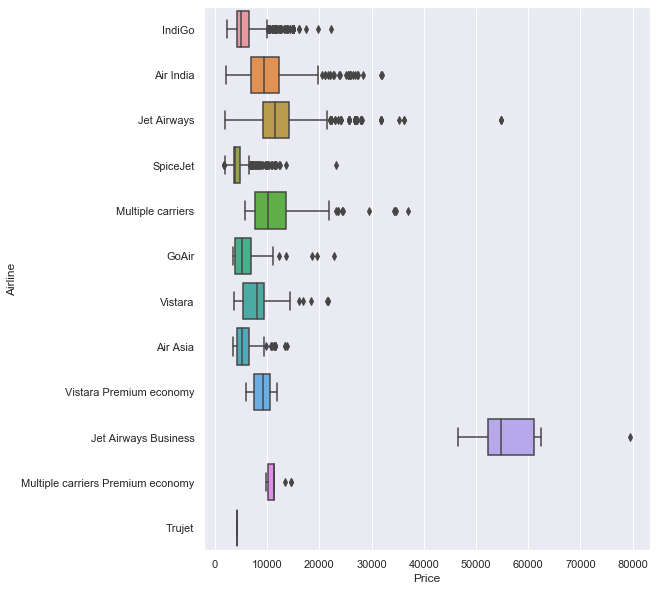

In [24]:
plt.figure(figsize=(8,10))
sns.boxplot(x='Price',y='Airline',data=train_data)

In [25]:
#One hot encoding for airline
airline=train_data['Airline']
airline=pd.get_dummies(airline,drop_first=True)


In [26]:
airline.shape

(10682, 11)

In [27]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [28]:
def ohe(data):
    data=train_data[data]
    data=pd.get_dummies(data,drop_first=True)
    return data

In [29]:
Flight_Source=ohe('Source')

In [30]:
Flight_destination=ohe('Destination')

In [31]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [32]:
#Route and number of stops are providing same information .
train_data.drop(['Route'],axis=1,inplace=True)

In [33]:
train_data.drop(['Additional_Info'],axis=1,inplace=True)

In [34]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
train_data

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,2019,11,30,14,10,2,40


In [36]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4},inplace=True)

In [37]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [38]:
data_train=pd.concat([train_data,airline,Flight_Source,Flight_destination],axis=1)

In [39]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_minute,Duration_Hours,Duration_Minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [41]:
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_minute,Duration_Hours,Duration_Minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Test Data

In [48]:
test_data=pd.read_excel(r'C:\Users\bilal\Projects\Flight Fare Prediction\Data\Test_set.xlsx')
pd.set_option('display.max_columns',None)
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [49]:
print(test_data.isnull().sum())    

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [50]:
test_data['Journey_Day']=pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.day
test_data['Journey_Month']=pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.month
test_data['Journey_Year']=pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.year

In [51]:
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [52]:
test_data['Departure_Hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Departure_Minute']=pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [53]:
#Handling Duration
duration=list(test_data['Duration'])
for i in range (len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
                      duration[i]=duration[i].strip() + " 0m"
        else:
                      duration[i]= "0h " + duration[i]
                      
Duration_Hours=[]
Duration_Minutes=[]
for i in range(len(duration)):
    Duration_Hours.append(int(duration[i].split(sep = 'h')[0]))
    Duration_Minutes.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

In [54]:
test_data['Duration_Hours']=Duration_Hours
test_data['Duration_Minutes']=Duration_Minutes
test_data.drop(['Duration'],axis=1,inplace=True)

In [55]:
airline=ohe('Airline')
Flight_Source=ohe('Source')
Flight_Destination=ohe('Destination')

In [56]:
#Route and number of stops are providing same information .
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [57]:
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4},inplace=True)

In [59]:
data_test=pd.concat([train_data,airline,Flight_Source,Flight_destination],axis=1)
data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [60]:
data_test.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_minute,Duration_Hours,Duration_Minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Feature Selection

In [61]:
X=data_train.drop(['Price'],axis=1)

In [62]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_minute,Duration_Hours,Duration_Minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [63]:
y=data_train['Price']

In [64]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

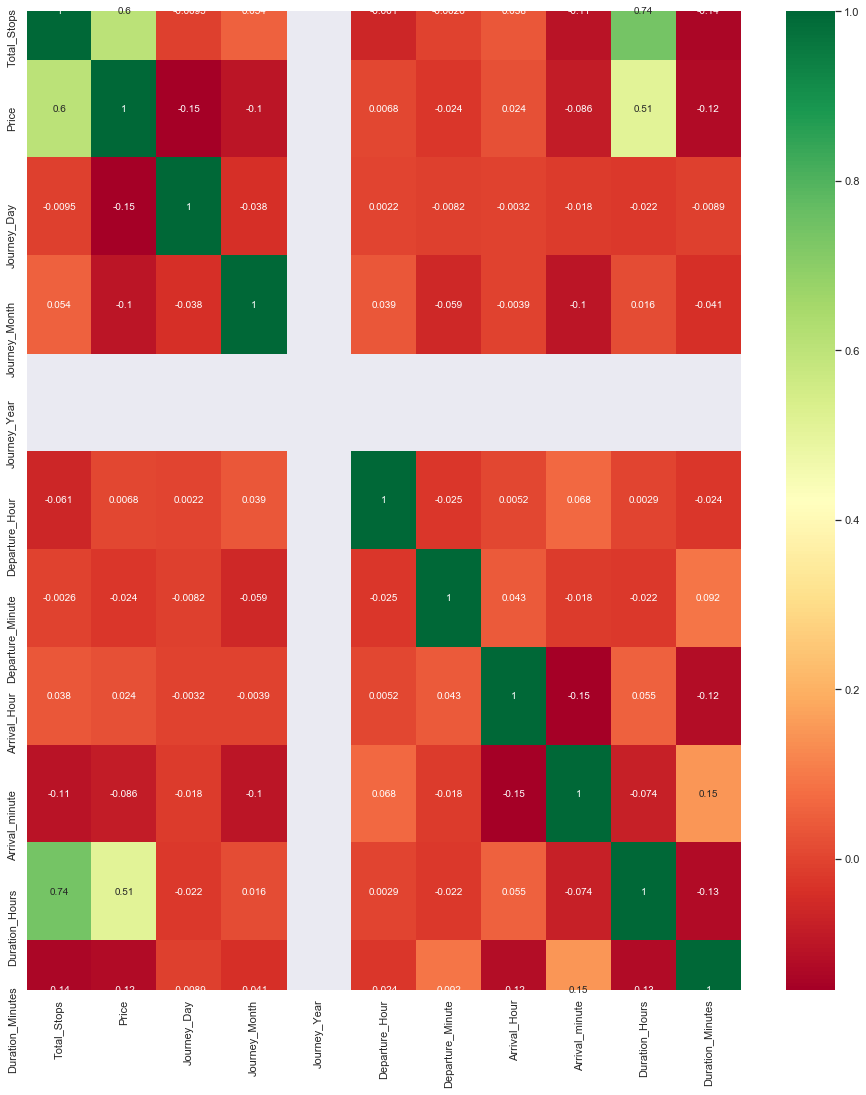

In [53]:
plt.figure(figsize=(16,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

In [66]:
#Feature selection
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

C:\Users\bilal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

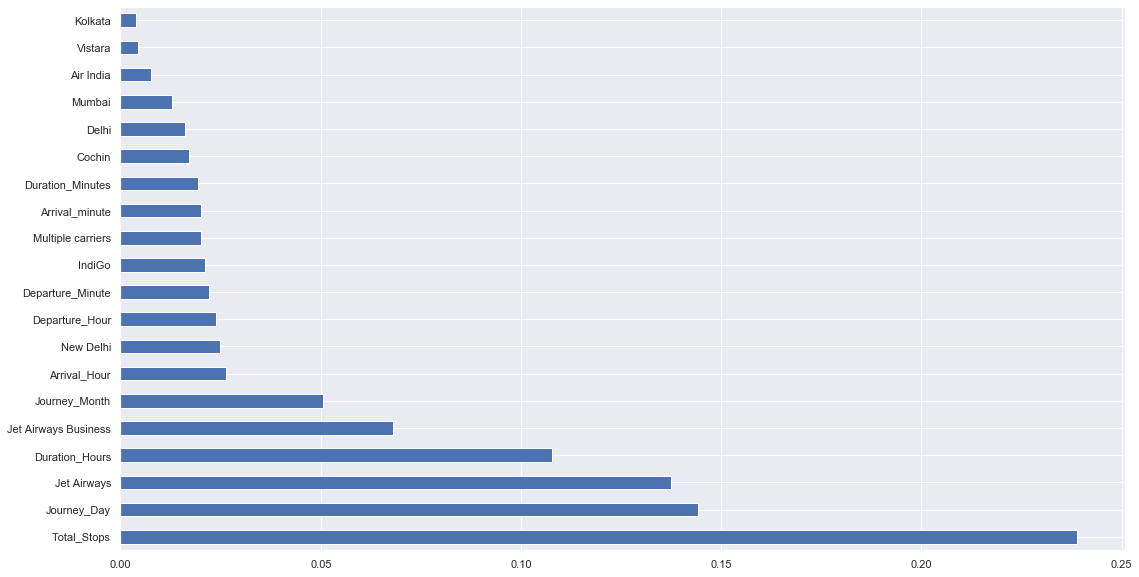

In [67]:
plt.figure(figsize=(18,10))
imp_feat=pd.Series(selection.feature_importances_,index=X.columns)
imp_feat.nlargest(20).plot(kind='barh')

## Model

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [92]:
X_train.head()

,Total_Stops,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_minute,Duration_Hours,Duration_Minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1730,1,21,3,2019,6,40,21,55,15,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5708,0,15,3,2019,19,35,21,5,1,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5431,0,15,5,2019,21,15,0,15,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7024,0,21,3,2019,9,35,12,20,2,45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9842,1,6,6,2019,17,0,10,55,17,55,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

C:\Users\bilal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [71]:
y_pred=model.predict(X_test)

In [72]:
model.score(X_train,y_train)

0.9428476901337407

In [75]:
model.score(X_test,y_test)

0.7975558749397145

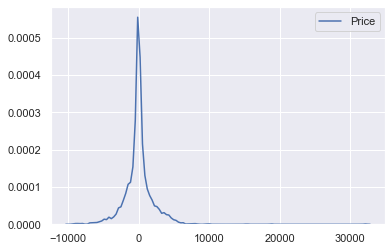

In [76]:
sns.kdeplot(y_test-y_pred)

In [77]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_pred,y_test)
print(mean_absolute_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))

1239.933082004955
0.7975558749397145


In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
#Parameters for randomize search

#Number of trees
n_estimators=[int (x) for x in np.linspace(start=100, stop=1200, num=12)]
#Number of features
max_features=['auto','sqrt']
#Maximum number of leaves in tree
max_depth=[int (x) for x in np.linspace(5,30,num = 6)]
#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#Minimum number of samples required at each node
min_samples_leaf=[1,2,5,10]

In [79]:
input_params={'n_estimators':n_estimators,'max_features':max_features,
             'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [82]:
rf_random=RandomizedSearchCV(estimator=model,param_distributions=input_params,n_iter=10,n_jobs=1,cv=5,
                             scoring='neg_mean_squared_error',verbose=2,random_state=100)

In [83]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  14.7s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  14.1s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  14.4s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  14.2s
[CV] n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=20, total=  15.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   3.8s
[CV] n_estimators=900, min_samples_split=5,

[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   4.6s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   4.7s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   4.9s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   4.6s
[CV] n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=600, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=5, total=   4.7s
[CV] n_estimators=700, min_samples_split=15

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [154]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [84]:
prediction=rf_random.predict(X_test)
print(metrics.r2_score(y_test,prediction))

0.8220927368110359


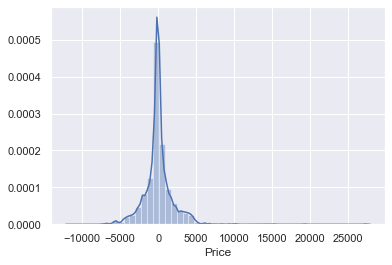

In [85]:
sns.distplot(y_test-prediction)
plt.show()

# Saving Model

In [86]:
import pickle

In [91]:
file=open('flight.pkl','wb')

#Dump information to the file
pickle.dump(rf_random,file)

In [88]:
final_model=open('flight.pkl','rb')
forest=pickle.load(final_model)

In [89]:
y_prediction=forest.predict(X_test)

In [90]:
print(metrics.r2_score(y_test,y_prediction))
print(mean_absolute_error(y_test,y_prediction))

0.8220927368110359
1183.8435918490995
